## Experiment 1: Threshold of SNr delay

I will test the range of Str activation that enables delayed firing of SNr. First, I will find the minimal number of Str cells need to pass delay, and then test the delay property from minimum to maximum number of Str cells to ensure that latency distribution remains unchanged. 

When 0% of Str cells are activated,


g_gp2snr =

    0.0820


Isyn_snr =

    1.4847

Elapsed time is 0.910740 seconds.
Elapsed time is 0.898719 seconds.
Elapsed time is 0.908762 seconds.
Elapsed time is 0.897110 seconds.
Elapsed time is 0.853569 seconds.
Elapsed time is 0.848951 seconds.
Elapsed time is 0.822199 seconds.
Elapsed time is 0.810393 seconds.
Elapsed time is 0.809199 seconds.
Elapsed time is 0.836848 seconds.


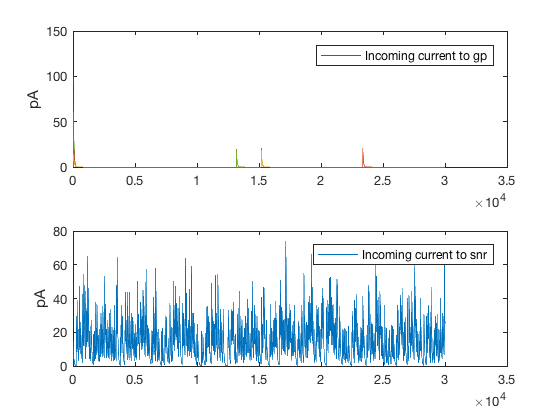

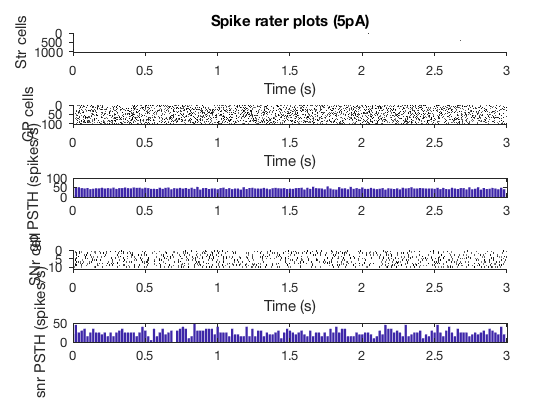

In [36]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


There is no transimission of signals to GPe and SNr. 

When 20% of cells are activated, cascade inhibition of SNr occurs.


g_gp2snr =

    0.7396


Isyn_snr =

   13.3271

Elapsed time is 0.878519 seconds.
Elapsed time is 0.904534 seconds.
Elapsed time is 0.863559 seconds.
Elapsed time is 0.832979 seconds.
Elapsed time is 0.839994 seconds.
Elapsed time is 0.867703 seconds.
Elapsed time is 0.868676 seconds.
Elapsed time is 0.870702 seconds.
Elapsed time is 0.847507 seconds.
Elapsed time is 0.841346 seconds.


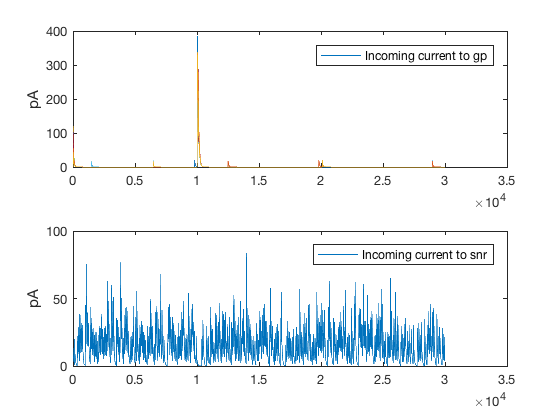

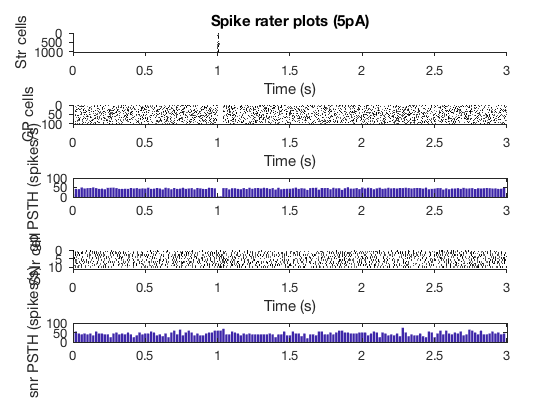

In [37]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',20,'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


Next, I was curious if increasing firing of GPe changes the threshold property. Changing f.r. of GPe from ~50Hz to ~20Hz blocked cascade disinhibition of SNr. 


g_gp2snr =

    0.2563


Isyn_snr =

    4.6862

Elapsed time is 0.951245 seconds.
Elapsed time is 0.917526 seconds.
Elapsed time is 0.859924 seconds.
Elapsed time is 0.844942 seconds.
Elapsed time is 0.884921 seconds.
Elapsed time is 0.837692 seconds.
Elapsed time is 0.809328 seconds.
Elapsed time is 0.859330 seconds.
Elapsed time is 0.881622 seconds.
Elapsed time is 0.850022 seconds.


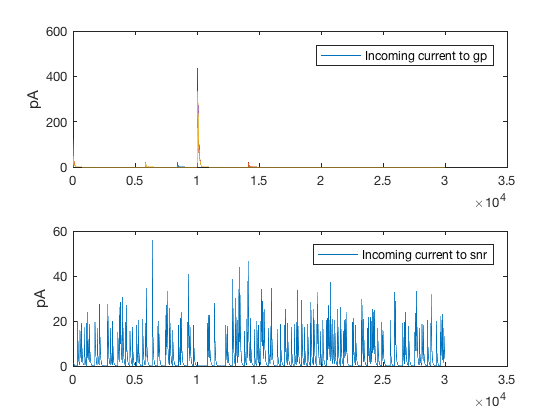

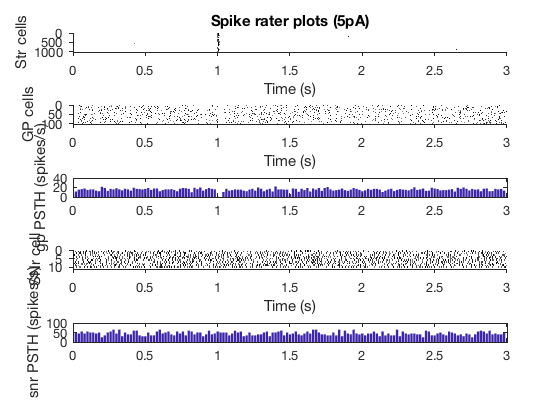

In [39]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',40,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',20,'I_exc_gp',40,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


At low firing of GPe, increasing percentage of cells activated in the striatum has relatively small effect in disinhibiting SNr.


g_gp2snr =

    0.2457


Isyn_snr =

    4.3863

Elapsed time is 0.859962 seconds.
Elapsed time is 0.873062 seconds.
Elapsed time is 0.892125 seconds.
Elapsed time is 0.862103 seconds.
Elapsed time is 0.849202 seconds.
Elapsed time is 0.873936 seconds.
Elapsed time is 0.844936 seconds.
Elapsed time is 0.848379 seconds.
Elapsed time is 0.800097 seconds.
Elapsed time is 0.804027 seconds.


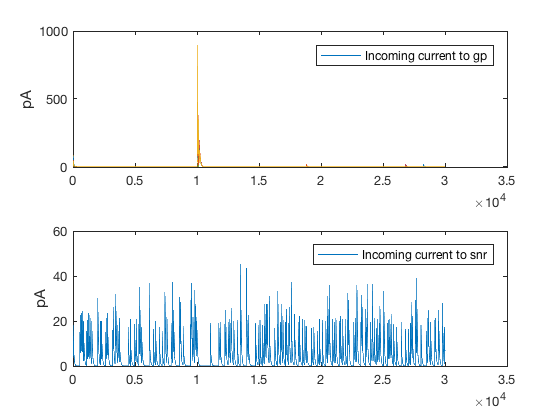

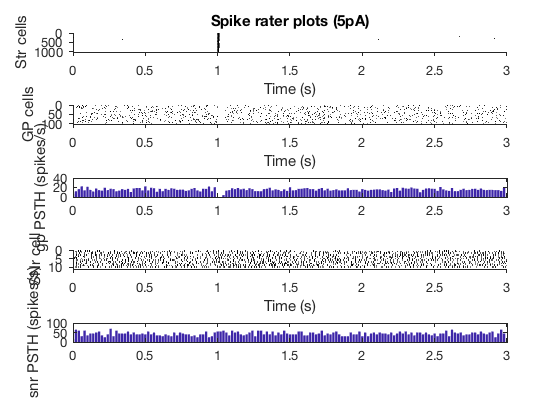

In [43]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',40,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

g_gp2snr
Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',40,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


The threshold of disinhibition of SNr is dependent on GPe basal firing rate. 


## Does the amount of Str activation change the latency of SNr firing?

I will compare the onset of increase in SNr firing while changing the percentage of Str cell activation from 10 to 100, in increments of 10.

Elapsed time is 0.819357 seconds.
Elapsed time is 0.889586 seconds.
Elapsed time is 0.842025 seconds.
Elapsed time is 0.829836 seconds.
Elapsed time is 0.791689 seconds.
Elapsed time is 0.794377 seconds.
Elapsed time is 0.817567 seconds.
Elapsed time is 0.880878 seconds.
Elapsed time is 0.856593 seconds.
Elapsed time is 0.859827 seconds.
Elapsed time is 0.822443 seconds.
Elapsed time is 0.882498 seconds.
Elapsed time is 0.834335 seconds.
Elapsed time is 0.865426 seconds.
Elapsed time is 0.830133 seconds.
Elapsed time is 0.865430 seconds.
Elapsed time is 0.889233 seconds.
Elapsed time is 0.868018 seconds.
Elapsed time is 0.847038 seconds.
Elapsed time is 0.816142 seconds.
Elapsed time is 0.868463 seconds.
Elapsed time is 0.869904 seconds.
Elapsed time is 0.827603 seconds.
Elapsed time is 0.826479 seconds.
Elapsed time is 0.828309 seconds.
Elapsed time is 0.800679 seconds.
Elapsed time is 0.849028 seconds.
Elapsed time is 0.934688 seconds.
Elapsed time is 0.914051 seconds.
Elapsed time i

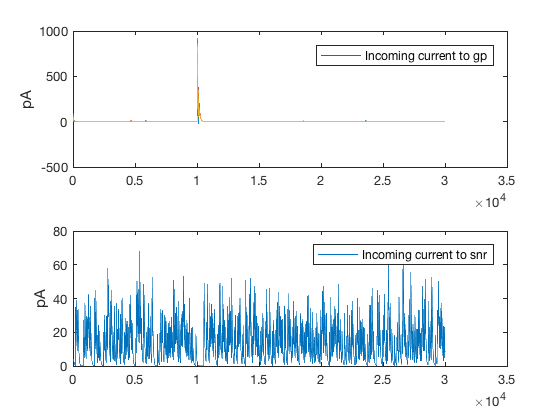

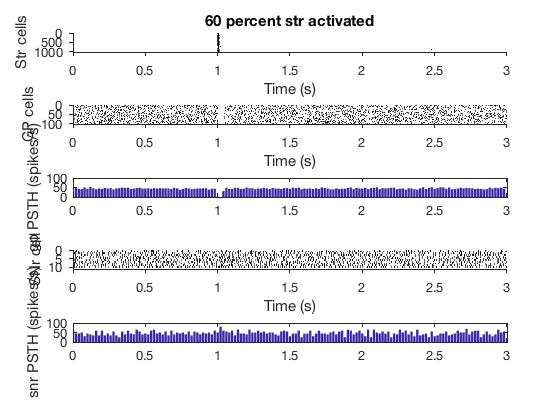

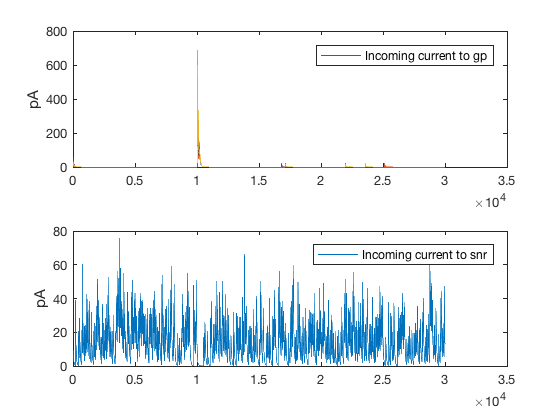

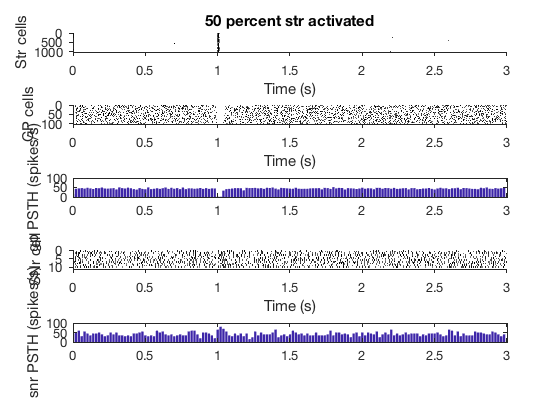

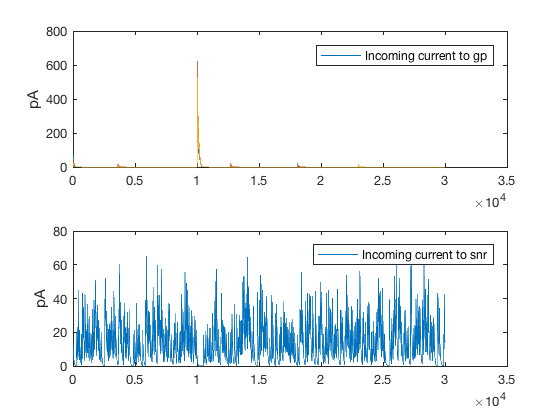

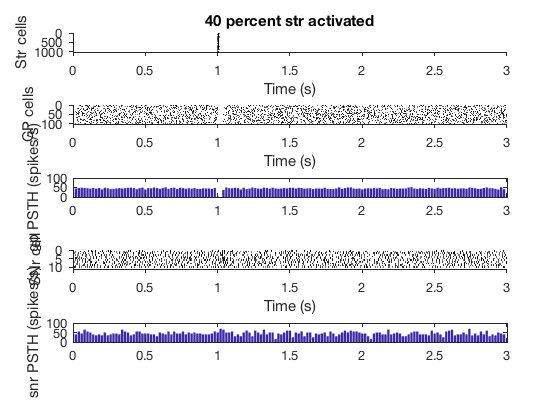

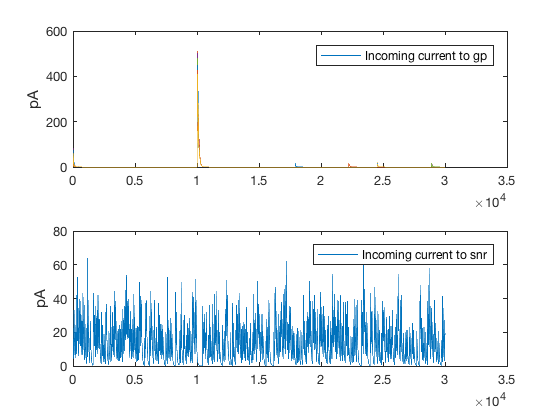

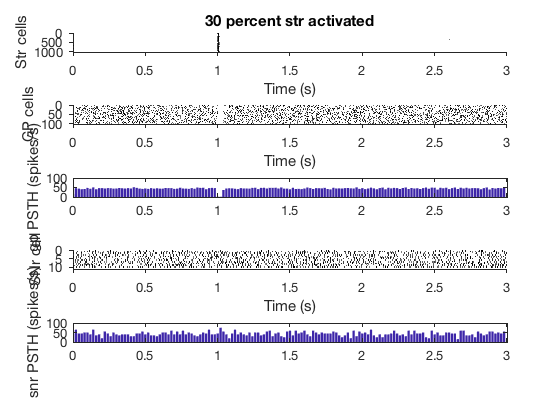

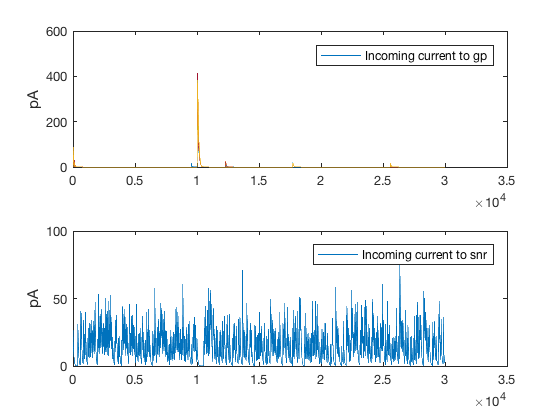

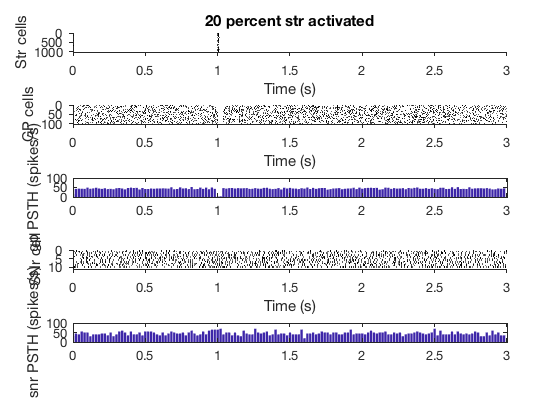

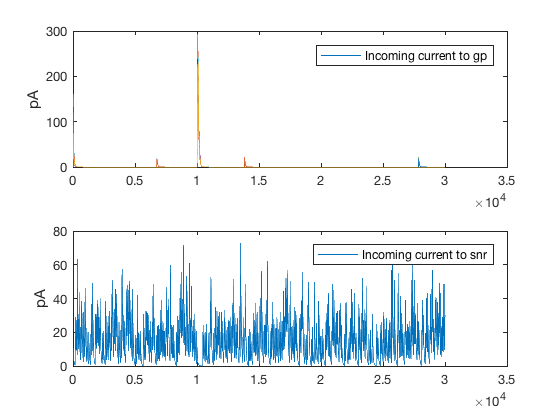

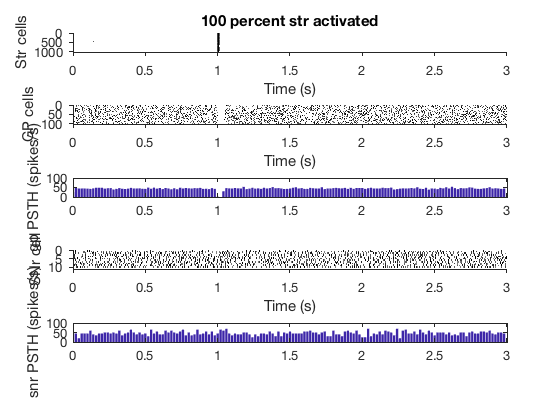

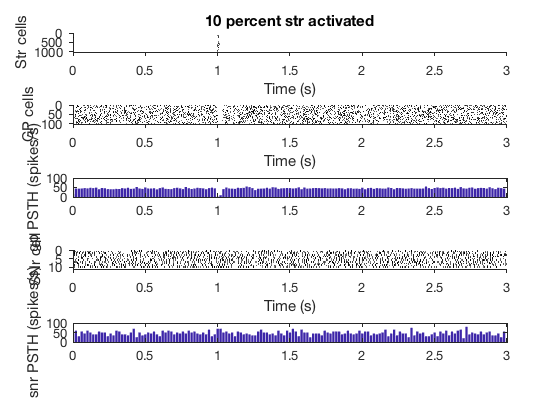

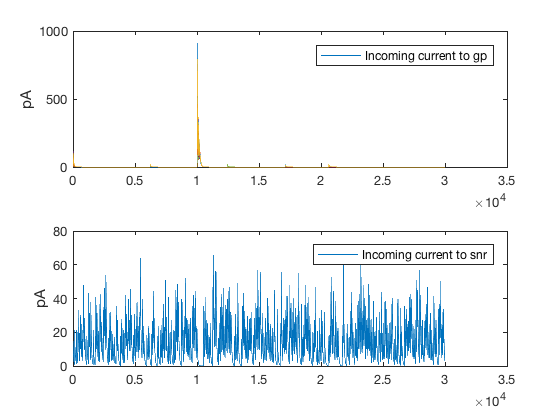

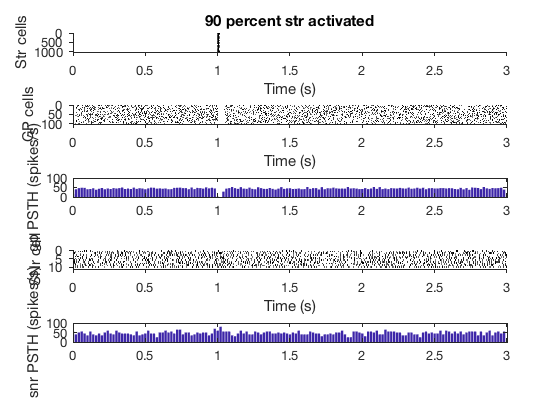

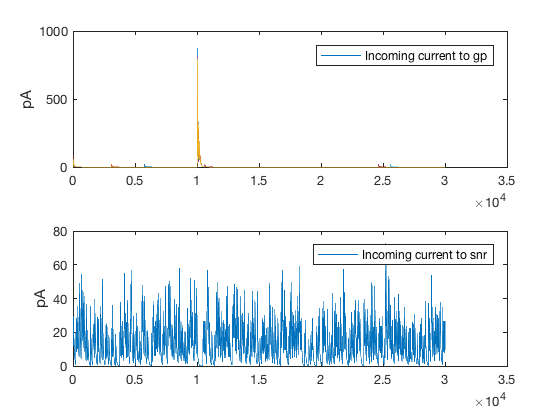

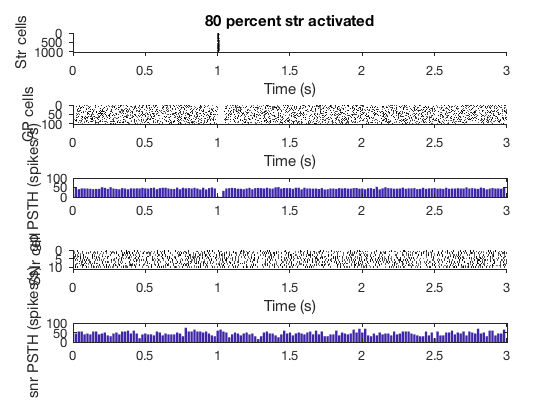

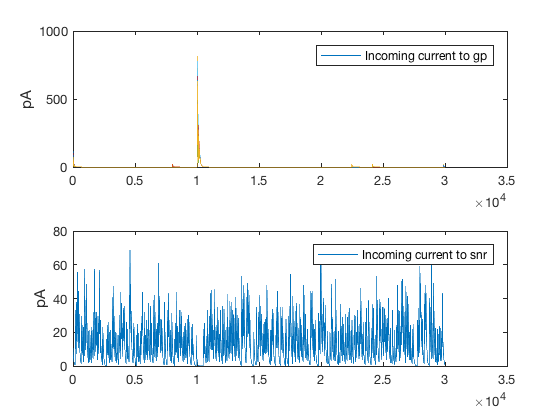

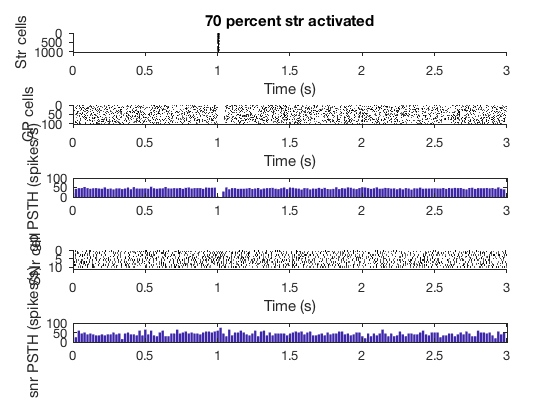

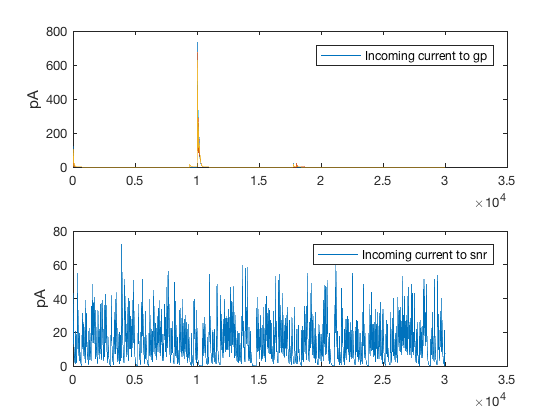

In [47]:
testRange = 10*(1:10);

for test_i = 1:length(testRange)
    % Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr,Isyn_snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

%g_gp2snr
%Isyn_snr

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',testRange(test_i),'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'Isyn_snr_i',Isyn_snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',testRange(test_i)))
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 200; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 200; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')

figure
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')
end

The latency for all conditions is <100ms 